# Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os
import scipy.special
import re

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 75446 bytes to pyBspline.py


# Periodic Bspline

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=10 #base caridnality
xmin = 0.0
xmax = 1.0

#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)

kv = Bs.periodic_kv(xmin,xmax,p=P,n=N)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

polinomial degree :  1
base caridnality  :  12
knots             :  [-0.09090909  0.          0.09090909  0.18181818  0.27272727  0.36363636
  0.45454545  0.54545455  0.63636364  0.72727273  0.81818182  0.90909091
  1.          1.09090909]


In [3]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [4]:
t = np.linspace(0,1,N,endpoint=False)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [5]:
#
NN = 1000
T = np.linspace(xmin,xmax,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

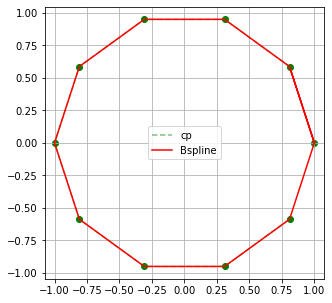

In [6]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.plot(df["x"], df["y"], color= "red",label="Bspline")
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
#plt.quiver( xy[index] , arrow[index] ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

In [7]:
der = bs.derivative()
arrow = der.evaluate(T)

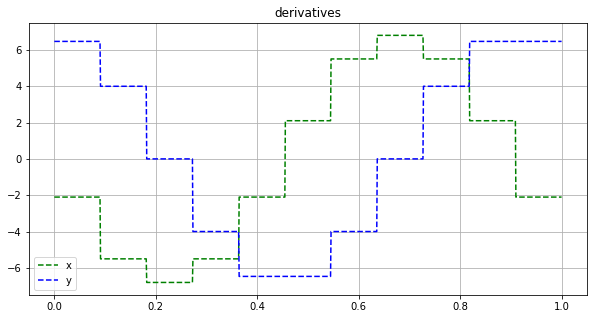

In [8]:
#grafico
plt.figure ( 0 , figsize = ( 10 , 5 ) )
   
#converto in dataframe    
plt.plot(T,arrow[:,0],color="green",label="x",linestyle="--",alpha=1)
plt.plot(T,arrow[:,1],color="blue",label="y",linestyle="--",alpha=1)
plt.legend()
plt.grid(True)
plt.title("derivatives")
plt.show()

# Hankel and Bessel functions

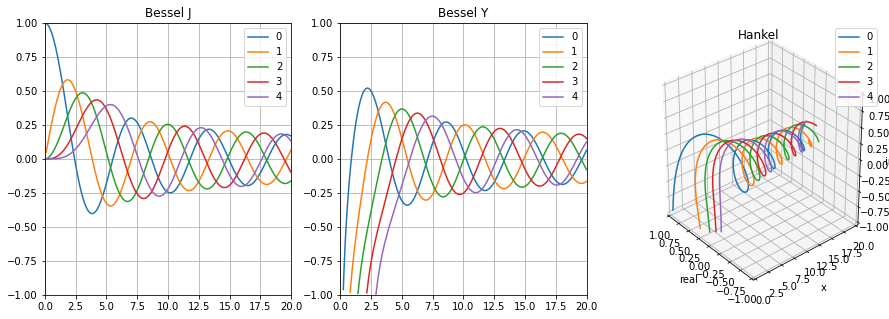

In [2]:
#
orders = [0,1,2,3,4]
t  = np.linspace(0.1,20,1000)

#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

#
ax = fig.add_subplot(131)  
for i in orders:
    B1 = scipy.special.jv(i,t)
    B1[B1<-1] = np.nan
    ax.plot(t, B1 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel J")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(132)  
for i in orders:
    B2 = scipy.special.yv(i,t)    
    B2[B2<-1] = np.nan
    ax.plot(t, B2 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel Y")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(133, projection='3d')  
for i in orders:
    H  = scipy.special.hankel1(i,t)
    Hr = H.real
    Hi = H.imag
    Hr[Hr<-1] = np.nan
    Hi[Hi<-1] = np.nan
    ax.plot(Hr, t, Hi ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Hankel")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(0,20)
ax.set_zlim3d(-1,1)
ax.set_xlabel( "real" )
ax.set_ylabel( "x" )
ax.set_zlabel( "imag" )
ax.invert_xaxis()
ax.view_init(elev=30, azim=-40)
plt.grid(True)
plt.legend()


#h = scipy.special.jv(i,t) + I*scipy.special.yv(i,t)
#H = scipy.special.hankel1(i,t)
#np.nanmean(np.absolute(h-H))

plt.show()

# BEM

## Basis function

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=20 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

In [3]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [4]:
t = np.linspace(0,1,N,endpoint=False)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [5]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

In [ ]:
fig = plt.figure ( 0 , figsize = ( 10, 8 ) )

bsCopy = bs.copy()
bsCopy.clear_cp()
bsScal = bsCopy._scalar()
br = bs.basis_range()

#
#s = 0.2
ax = fig.add_subplot(111, projection='3d')

for i in range(N):
    print(i+1,"/",N,end="\r")
    #u = np.linspace(br.at[(i,),("min",0)],br.at[(i,),("max",0)],100)
    u = np.linspace(0,1,1000,endpoint=True)
    bsCopy.set_cp(i,bs.get_cp(i))
    bsScal.set_cp(i,1.)
    xyB = bs.evaluate(u)
    zB = bsScal.evaluate(u)
    
    #xyB = xyB[zB != 0]
    #zB  = zB[zB != 0]
    
    #xyB,zB = [ i,j for i,j in zip(xyB,zB) if j != 0.0 ]
    
    ax.plot(xyB[:,0], xyB[:,1],zB,label=str(i))
    
    bsCopy.set_cp(i,[0,0])
    bsScal.set_cp(i,0.)
    
print("Finished")

ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
ax.set_zlim(0,1)
plt.grid(True)
#plt.legend()
plt.show()

## Circle

### Definition

In [21]:
k_in = np.asarray([10.0,0.0])
wavevector = np.sqrt(np.sum(np.power(k_in,2.0)))
I = np.complex(0,1)

xmin = -5
xmax = 5.
ymin = -2
ymax = 2

In [22]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=50 #base caridnality
xminBs = 0.0
xmaxBs = 1.0


#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xminBs,xmaxBs,p=P,n=N)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

In [23]:
file_dir = "files/BEM/circle/"
suffix = "P="+str(P)+"-N="+str(N)+"-k="+str(wavevector)+".csv"

In [24]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [25]:
t = np.linspace(0,1,N)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

### Geometry

In [26]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

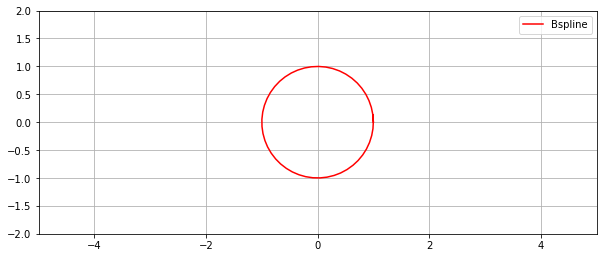

In [27]:
#grafico
fig = plt.figure ( 0 , figsize = ( 10, 5 ) )
   
#converto in dataframe    
ax = fig.add_subplot(111)
#plt.plot(cpx,cpy,color="green",label="cp",linestyle="--")
#plt.scatter(cpx,cpy,color="green")
plt.plot(df["x"], df["y"], color= "red",label="Bspline")
plt.grid()
plt.legend()
ax.set_aspect('equal')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

### Plane wave

In [28]:
def plot(fig,n,xB,yB,x,y,c,title,cmap):
    
    ax = fig.add_subplot(n)
    ax.plot(xB, yB, color= "black",label="Bspline")
    sc = ax.scatter(x,y,c=c,cmap=cmap)
    plt.colorbar(sc)
    ax.set_aspect('equal')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.title(title)
    
    return

In [29]:
def plane_wave(xx): # soluzione
    xx = np.asarray(xx)
    theta = np.dot(xx,k_in)
    return np.exp(I*theta)

In [30]:
#
NN = 1000
T = np.linspace(xminBs,xmaxBs,NN,endpoint=True)
xy   = bs.evaluate(T)
uinc = plane_wave(xy)

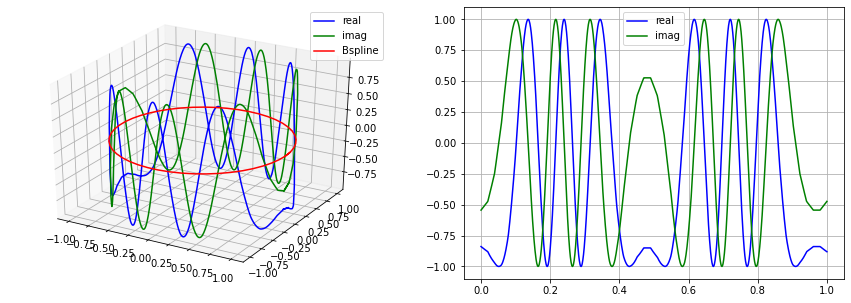

In [31]:
#
fig = plt.figure ( 0 , figsize = ( 15, 5 ) )

#
#s = 0.2
ax = fig.add_subplot(121, projection='3d')
ax.plot(xy[:,0], xy[:,1],uinc.real,color="blue",label="real")
ax.plot(xy[:,0], xy[:,1],uinc.imag,color="green",label="imag")
ax.plot(xy[:,0], xy[:,1],0.0,color="red",label="Bspline")
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(122)#, projection='3d')
ax.plot(T,uinc.real,color="blue",label="real")
ax.plot(T,uinc.imag,color="green",label="imag")
plt.grid(True)
plt.legend()

#
#ax = fig.add_subplot(133)#, projection='3d')
#ax.plot(T,somma.real,color="blue",label="real")
#ax.plot(T,somma.imag,color="green",label="imag")
#plt.grid(True)
#plt.legend()

plt.show()

In [32]:
Nx= int(xmax-xmin)*30
Ny = int(ymax-ymin)*10
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
X,Y = np.meshgrid(x,y)

XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))

#tolgo elementi interni
radius = np.asarray([np.sqrt(np.sum(np.power(i,2.0))) for i in XY])
XYslp = XY#[radius > 1.0]
print(len(XYslp)," = ",len(XYslp)*3/3600,"h")

12000  =  10.0 h


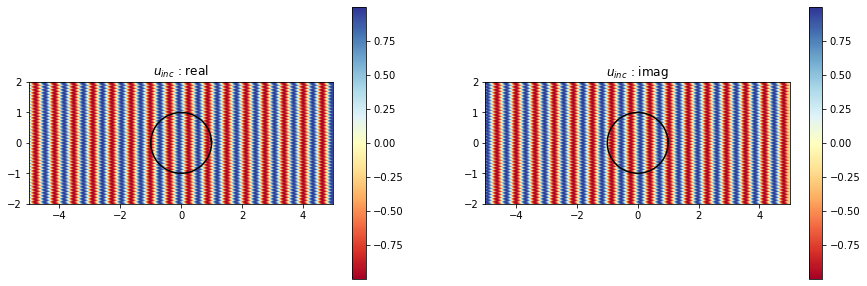

In [34]:
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

Uinc = plane_wave(XYslp)

cmap = 'RdYlBu'
    
plot(fig,121,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.real,"$u_{inc}$ : real",cmap)
plot(fig,122,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.imag,"$u_{inc}$ : imag",cmap)

### Stiffness Matrix

In [36]:
file = file_dir+"stiffness_matrix-"+suffix
file

'files/BEM/circle/stiffness_matrix-P=1-N=50-k=10.0.csv'

In [37]:
READ = False
SAVE = True
if os.path.exists(file) and READ == True :
    sm = bs.load("sm-BEM",file)
else :
    sm = bs.stiffness_matrix_BEM(k=wavevector,opts={"print":True})
    if SAVE == True :
        bs.save("sm-BEM",file)
#sm

### Single Layer Potential basis

In [38]:
file = file_dir+"single_layer_potential-"+suffix
file

'files/BEM/circle/single_layer_potential-P=1-N=50-k=10.0.csv'

In [ ]:
READ = False
SAVE = True
if os.path.exists(file) and READ == True :
    slp = bs.load("slp-BEM",file)
else :
    slp = bs.single_layer_potential_basis_BEM(XY=XYslp,k=wavevector,opts={"print":True})
    if SAVE == True :
        bs.save("slp-BEM",file)
#slp

### Solution

In [ ]:
file_sol = file_dir+"solution-plane_wave-"+suffix
file_lv  = file_dir+"load_vector-plane_wave-"+suffix
file_ind = file_dir+"indirect_solution-plane_wave-"+suffix
print(file_sol)
print(file_lv)
print(file_ind)

In [ ]:
READ = False
SAVE = True
if os.path.exists(file_sol) and READ == True :
    sol,Xnp,Valnp = bs.load("sol-BEM",file_sol)
    
if os.path.exists(file_lv) and READ == True :
    sol,Xnp,Valnp = bs.load("lv-BEM",file_lv)
    
if os.path.exists(file_ind) and READ == True :
    sol,Xnp,Valnp = bs.load("ind_sol-BEM",file_ind)
    
else :
    sol,Xnp,Valnp = bs.BEM(uinc=plane_wave,k=wavevector,XY=XYslp,opts=None)
    if SAVE == True :
        bs.save("sol-BEM",file_sol)
        bs.save("lv-BEM",file_lv)
        bs.save("ind_sol-BEM",file_ind)
#sol

In [ ]:
#
Uinc = plane_wave(XYslp)#.reshape(Nx,Ny).transpose()
total = Uinc + Valnp

In [ ]:
#grafico
fig = plt.figure ( 0 , figsize = ( 15 , 8 ) )

##################################
# u_inc
#Real
ax = fig.add_subplot(321)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
#ax.pcolormesh(X,Y,Ur,cmap="Blues")
ax.scatter(XYslp[:,0],XYslp[:,1],c=Uinc.real)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("$u_{inc}$ : real")

#################
#Imag
ax = fig.add_subplot(322)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
#ax.pcolormesh(X,Y,Ui,cmap="Blues")
ax.scatter(XYslp[:,0],XYslp[:,1],c=Uinc.imag)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("$u_{inc}$ : imaginary")

##################################
# scattered
#Real
ax = fig.add_subplot(323)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.scatter(Xnp[:,0],Xnp[:,1],c=Valnp.real)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("scattered : real")

#################
#Imag
ax = fig.add_subplot(324)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.scatter(Xnp[:,0],Xnp[:,1],c=Valnp.imag)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("scattered : imaginary")

##################################
# total
#Real
ax = fig.add_subplot(325)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.scatter(Xnp[:,0],Xnp[:,1],c=total.real)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("total : real")

#################
#Imag
ax = fig.add_subplot(326)
ax.plot(df["x"], df["y"], color= "red",label="Bspline")
ax.scatter(Xnp[:,0],Xnp[:,1],c=total.imag)
ax.set_aspect('equal')
#plt.legend()
#plt.grid(True)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title("total : imaginary")

plt.show()

In [ ]:
#grafico
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )

cmap = 'RdYlBu'
    
plot(fig,331,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.real,"$u_{inc}$ : real",cmap)
plot(fig,334,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Uinc.imag,"$u_{inc}$ : imag",cmap)
plot(fig,337,df["x"], df["y"],XYslp[:,0],XYslp[:,1],np.absolute(Uinc),"$u_{inc}$ : abs",cmap)

plot(fig,332,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Valnp.real,"$u_{scat}$ : real",cmap)
plot(fig,335,df["x"], df["y"],XYslp[:,0],XYslp[:,1],Valnp.imag,"$u_{scat}$ : imag",cmap)
plot(fig,338,df["x"], df["y"],XYslp[:,0],XYslp[:,1],np.absolute(Valnp),"$u_{scat}$ : abs",cmap)

plot(fig,333,df["x"], df["y"],XYslp[:,0],XYslp[:,1],total.real,"$u_{tot}$ : real",cmap)
plot(fig,336,df["x"], df["y"],XYslp[:,0],XYslp[:,1],total.real,"$u_{tot}$ : imag",cmap)
plot(fig,339,df["x"], df["y"],XYslp[:,0],XYslp[:,1],np.absolute(total),"$u_{tot}$ : abs",cmap)

plt.show()

- scelgo i punti in cui valutare la soluzione
- calcolo il valore della soluzione con $\psi_i$ al posto di $\psi$
- poi modificando $u_{inc}$ varierà $\psi$ ma potrò comunque sfruttare la matrice calcolata

- devo incrementare il numero di punti usati per calcolare la matrice di stiffness
- devo tener conto della periodicità nel domionio delle funzioni 
- devo tener conto che adesso il numero di funzioni di base è diverso da quello dei control points (perché alcuni sono periodici)
- creo una funzione che per ogni control point mi restituisce le funzioni di base

- devo creare delle Bspline periodiche
- l'ultimo control points non deve essere accessibile
- devo modificare le funzioni di approssimazione
- devo togliere dalle matrici le righe che corrispondono ai dof periodici dopo aver sommato il loro contributo agli altri dof
- sistemare solo la funzione approximate per adesso

- approximate
- edge
- Dirichlet_BC
- Galerkin

cioè solo le funzioni che vanno a modificare i control points della Bspline